# Classifying high crime rate using the `Boston` dataset

*Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.*

## Data decription

This data contains the following columns:

- `crim`: per capita crime rate by town.
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `indus`: proportion of non-retail business acres per town.
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `nox`: nitrogen oxides concentration (parts per 10 million).
- `rm`: average number of rooms per dwelling.
- `age`: proportion of owner-occupied units built prior to 1940.
- `dis`: weighted mean of distances to five Boston employment centres.
- `rad`: index of accessibility to radial highways.
- `tax`: full-value property-tax rate per \$10,000.
- `ptratio`: pupil-teacher ratio by town.
- `black`: $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town.
- `lstat`: lower status of the population (percent).
- `medv`: median value of owner-occupied homes in $1000s.

So `chas` and `rad` are qualitative variables, while the rest are quantitative

## Prepare the data

In [1]:
import pandas as pd

boston = pd.read_csv('../../datasets/boston.csv', index_col=0).reset_index(drop=True)

In [2]:
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


## Add high/low crime class variable and drop `crim` variable

We'll let 1 denote high crime (above the median) and 0 denote below. We also drop `crim` variable <sup><a href='#foot1' id='ref1'>1</a></sup>

In [4]:
boston['high_crim'] = (boston['crim'] > boston['crim'].median()).astype('int32')
boston = boston.drop(['crim'], axis=1)
boston.head()

zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio   black  \
0  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   
1   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
2   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
3   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
4   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   

   lstat  medv  high_crim  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          0  
3   2.94  33.4          0  
4   5.33  36.2          0

## Train/test split

In [5]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(boston.drop(['high_crim'], axis=1)), boston['high_crim'])

In [6]:
X_train.shape

(379, 14)

In [7]:
X_test.shape

(127, 14)

## Dummy classifier

As a baseline, we'll train a dummy model

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_model = DummyClassifier()

In [9]:
print("The dummy model has train accuracy {}".format(
      accuracy_score(y_train, dummy_model.fit(X_train, y_train).predict(X_train))))
print("The dummy model has test accuracy {}".format(
      accuracy_score(y_test, dummy_model.fit(X_train, y_train).predict(X_test))))

The dummy model has train accuracy 0.49076517150395776
The dummy model has test accuracy 0.5433070866141733


## Naive Logit, LDA and KNN classifiers

As a next step, we'll train logistic regression, LDA and KNN models ($K = 1, 3, 5$) on the full set of predictors, with no adjustments <sup><a href='#foot2' id='ref1'>2</a></sup>.

In [10]:
from sklearn.linear_model import LogisticRegression as Logit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN

import warnings  
warnings.filterwarnings('ignore')

In [11]:
# dict for models
models = {}

# create model instances
models['Logit'] = Logit()
models['LDA'] = LDA()
for i in range(1, 6):
    models['KNN' + str(i)] = KNN(n_neighbors=i)

In [12]:
for model in models:
    print("The naive {} model has train accuracy {}".format(model, 
          round(accuracy_score(y_train, 
                               models[model].fit(X_train, y_train).predict(X_train)), 4)))

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The naive Logit model has train accuracy 0.8707
The naive LDA model has train accuracy 0.8602
The naive KNN1 model has train accuracy 1.0
The naive KNN2 model has train accuracy 0.9631
The naive KNN3 model has train accuracy 0.9551
The naive KNN4 model has train accuracy 0.9578
The naive KNN5 model has train accuracy 0.9393


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [13]:
for model in models:
    print("The naive {} model has test accuracy {}".format(
          model, round(accuracy_score(y_test, models[model].predict(X_test)), 4)))

The naive Logit model has test accuracy 0.811
The naive LDA model has test accuracy 0.8031
The naive KNN1 model has test accuracy 0.9213
The naive KNN2 model has test accuracy 0.9291
The naive KNN3 model has test accuracy 0.9055
The naive KNN4 model has test accuracy 0.9134
The naive KNN5 model has test accuracy 0.8898


## EDA

### Inspection and Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')
sns.set_style('white')

#### Pairplot

/Users/home/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/home/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


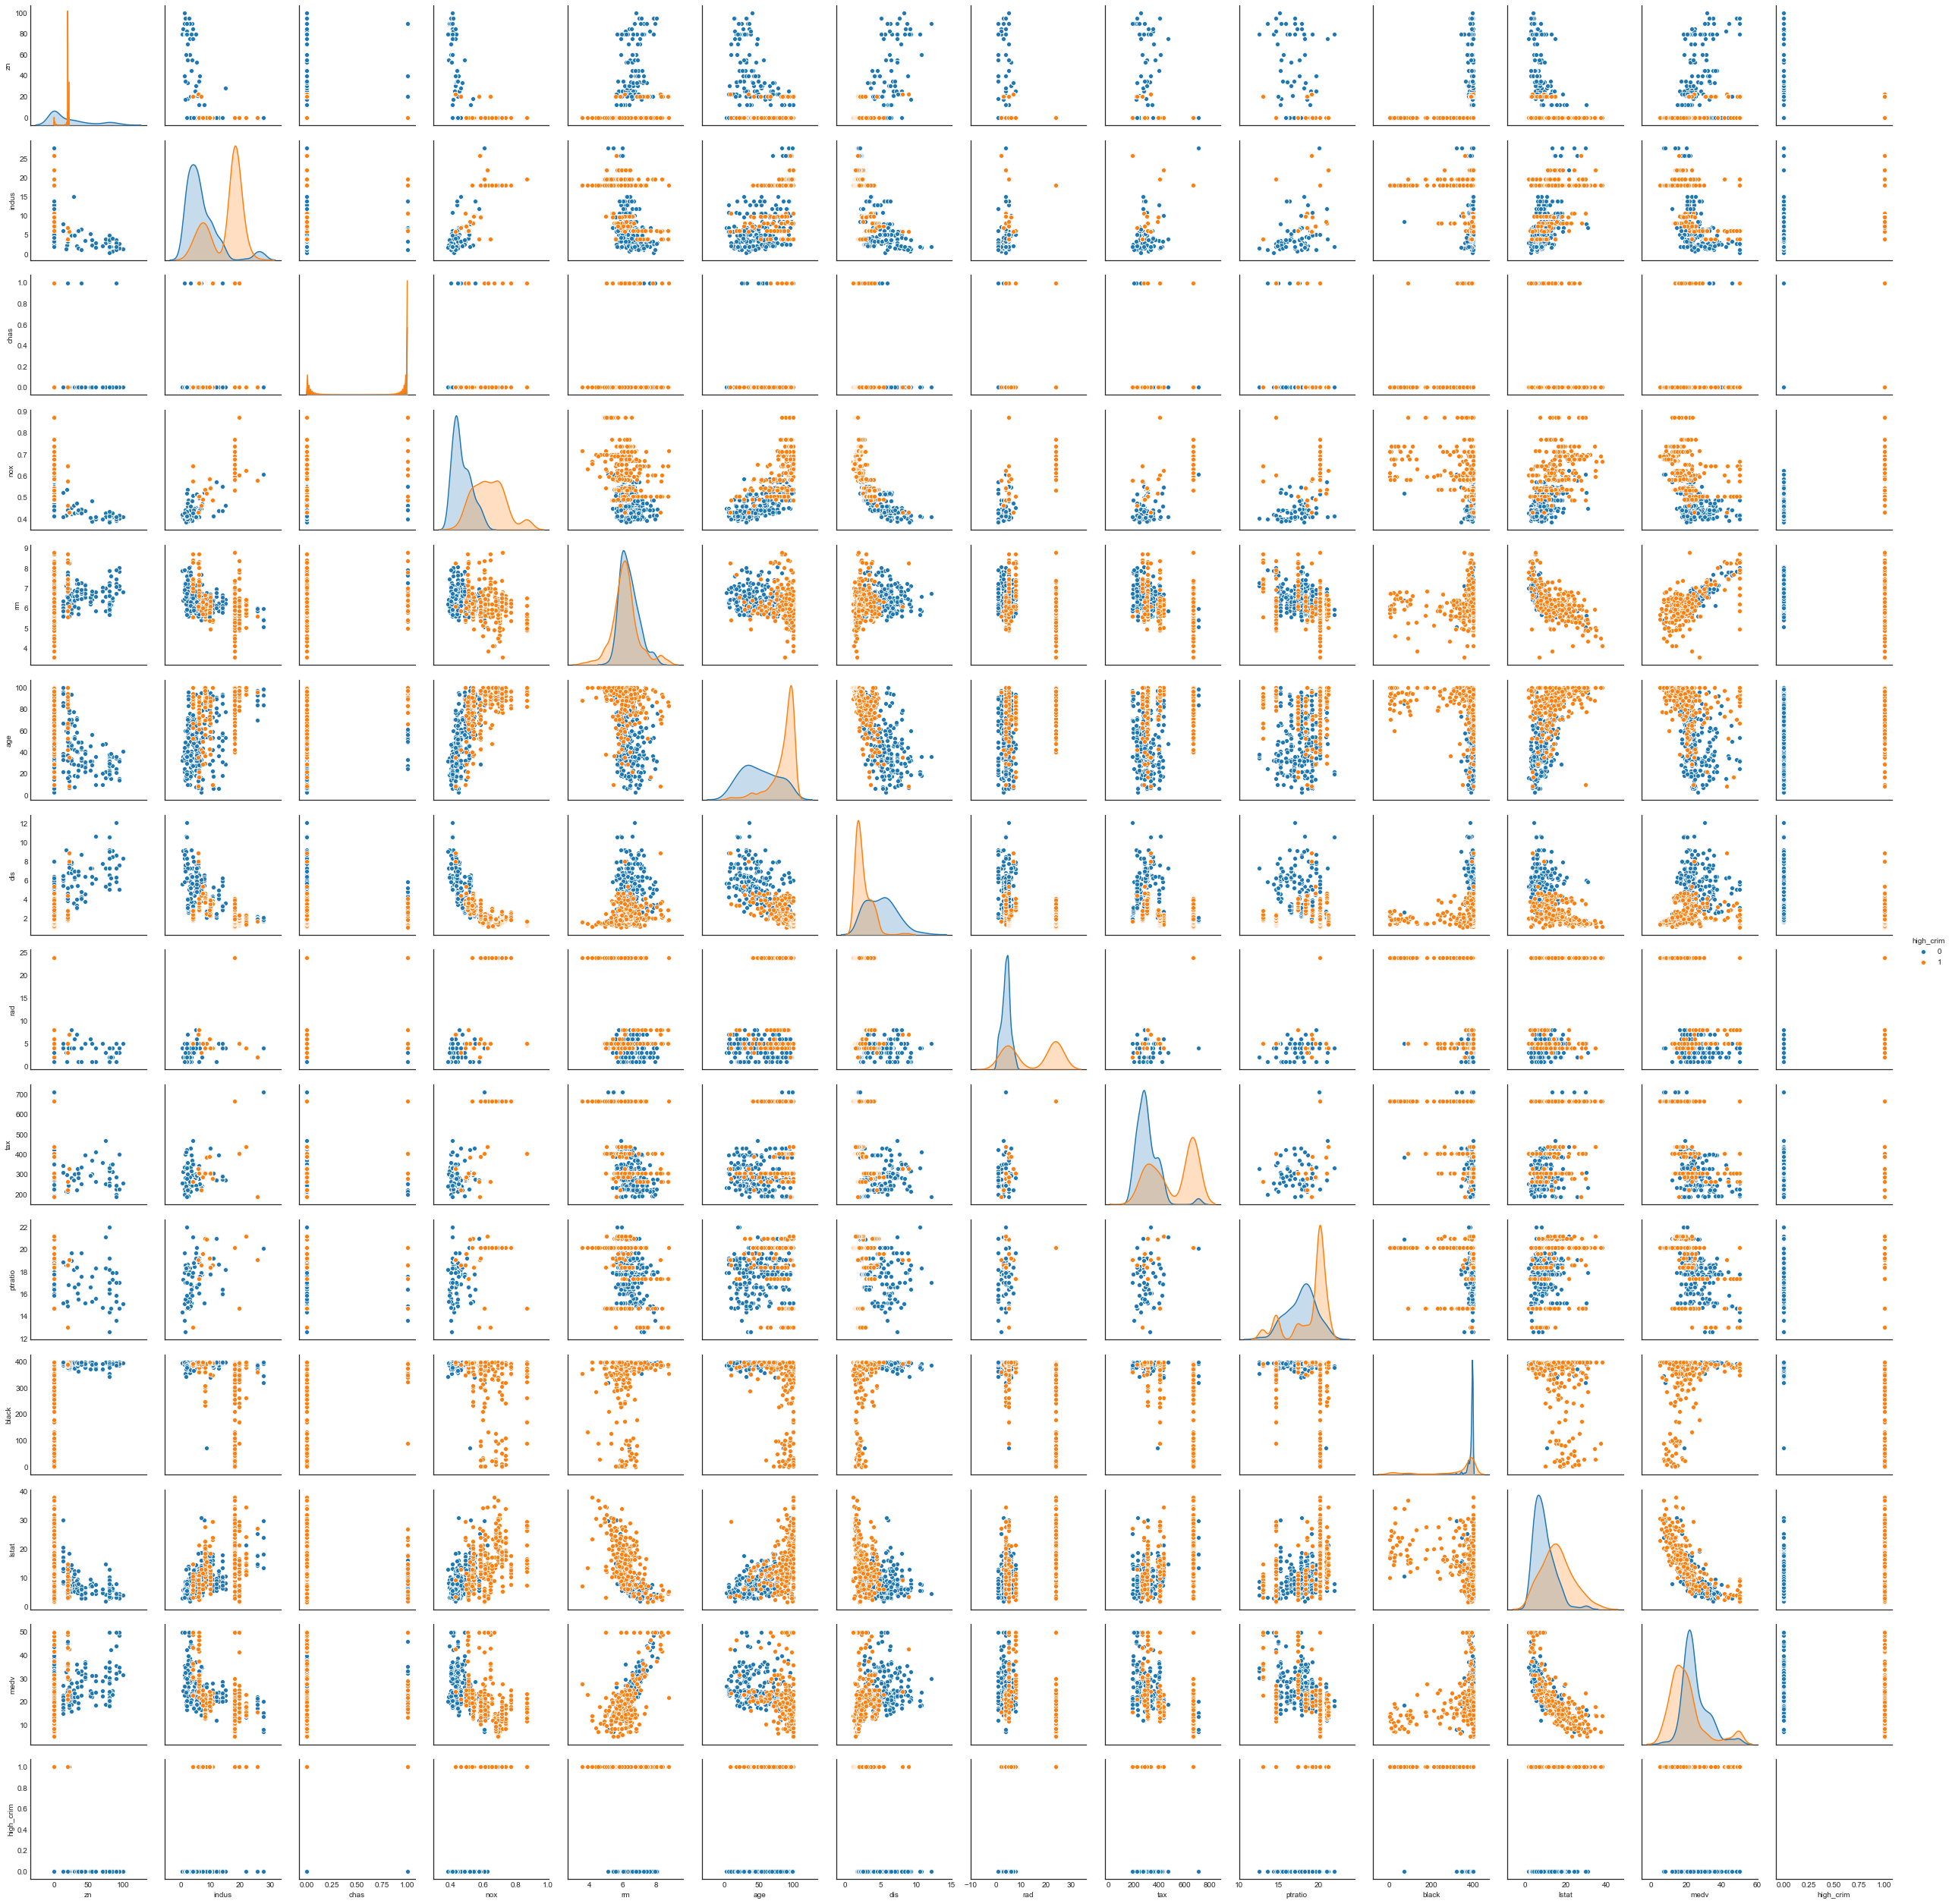

In [15]:
sns.pairplot(boston, hue='high_crim')

##### Observations about distributions

- `zn` has very low variance in the high crime class, but much higher variance in the low crime class. It is unimodal in both classes.
- `indus` appears [bimodal](https://en.wikipedia.org/wiki/Multimodal_distribution) in both classes and may perhaps be modeled as a mixture of normals. The high crime class appears to have a higher mean. The distribution appears to be nearly identical for both classes, so this likely will not be a helpful predictor.
- `chas` is a binary variable heavily concentrated in the value 1 (hence a large majority of observations "bound" the Charles river).
- `nox` appears approximately normal in the classes. The high crime class has a higher mean and a much higher variance
- `rm` appears normal in the classes, but the distributions are very similar across classes. This will likely not be a helpful predictor.
- `age` appears approximately normal in the low crime classes, or at least symmetric. It is unimodal in the classes. The high crime class is heavily skewed to the right with a higher mean and a much lower variance.
- `dis` appears approximately normal in the low crime class. The high crime class is heavily skewed to the left, with a lower mean and much lower variance.
- `rad` is approximately symmetric in both classes, unimodal in the low crime class, and bimodal in the high crime class. The high crime class has a higher mean and much higher variance.
- `tax` is similar to `rad` but the high crime class is more concentrated around each mode.
- `ptratio` appears approximately normal in the low crime class. The means for both classes are similar. The high crime class is heavily skewed to the right, with high variance.
- `black` has very low variance in both classes. Both classes are heavily skewed to the right, with long tails. The high crime class is less concentrated about its mode.
- `lstat` appears approximately normal in the high crime class which has a higher mean and variance. The low crime class is skewed a bit to the left.
- `medv` appears approximately normal in both classes. The high crime class has a lower mean and higher variance.

##### Observations about correlations

In [16]:
# strong correlation 
boston.corr()[abs(boston.corr()) > 0.70]

zn     indus  chas       nox   rm       age       dis       rad  \
zn         1.0       NaN   NaN       NaN  NaN       NaN       NaN       NaN   
indus      NaN  1.000000   NaN  0.763651  NaN       NaN -0.708027       NaN   
chas       NaN       NaN   1.0       NaN  NaN       NaN       NaN       NaN   
nox        NaN  0.763651   NaN  1.000000  NaN  0.731470 -0.769230       NaN   
rm         NaN       NaN   NaN       NaN  1.0       NaN       NaN       NaN   
age        NaN       NaN   NaN  0.731470  NaN  1.000000 -0.747881       NaN   
dis        NaN -0.708027   NaN -0.769230  NaN -0.747881  1.000000       NaN   
rad        NaN       NaN   NaN       NaN  NaN       NaN       NaN  1.000000   
tax        NaN  0.720760   NaN       NaN  NaN       NaN       NaN  0.910228   
ptratio    NaN       NaN   NaN       NaN  NaN       NaN       NaN       NaN   
black      NaN       NaN   NaN       NaN  NaN       NaN       NaN       NaN   
lstat      NaN       NaN   NaN       NaN  NaN       NaN       NaN       NaN   
medv       NaN       NaN   NaN       NaN  NaN       NaN       NaN       NaN   
high_crim  NaN       NaN   NaN  0.723235  NaN       NaN       NaN       NaN   

                tax  ptratio  black     lstat      medv  high_crim  
zn              NaN      NaN    NaN       NaN       NaN        NaN  
indus      0.720760      NaN    NaN       NaN       NaN        NaN  
chas            NaN      NaN    NaN       NaN       NaN        NaN  
nox             NaN      NaN    NaN       NaN       NaN   0.723235  
rm              NaN      NaN    NaN       NaN       NaN        NaN  
age             NaN      NaN    NaN       NaN       NaN        NaN  
dis             NaN      NaN    NaN       NaN       NaN        NaN  
rad        0.910228      NaN    NaN       NaN       NaN        NaN  
tax        1.000000      NaN    NaN       NaN       NaN        NaN  
ptratio         NaN      1.0    NaN       NaN       NaN        NaN  
black           NaN      NaN    1.0       NaN       NaN        NaN  
lstat           NaN      NaN    NaN  1.000000 -0.737663        NaN  
medv            NaN      NaN    NaN -0.737663  1.000000        NaN  
high_crim       NaN      NaN    NaN       NaN       NaN   1.000000

With the (somewhat arbitrary) threshold of $0.70$, we observe the following (distinct) strong correlation pairs

- `indus` is strongly positively correlated with `nox` and `tax` and strongly negatively correlated with  `dis` 
- `nox` is strongly positively correlated with `age` and `high_crim` and strongly negatively correlated with `dis`
- `rad` is strongly positively correlated with `tax`
- `lstat` is strongly positively correlated with `medv`

#### Violin, strip and count plots

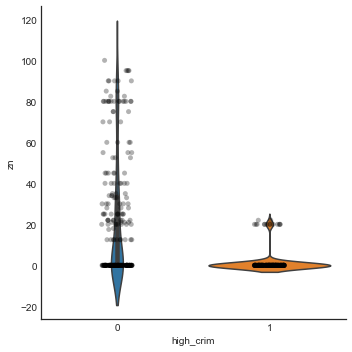

In [17]:
sns.catplot(x='high_crim', y='zn', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='zn', data=boston, color='k', alpha=0.3)

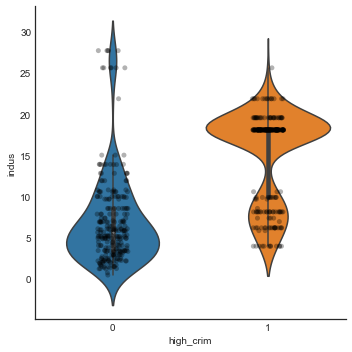

In [18]:
sns.catplot(x='high_crim', y='indus', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='indus', data=boston, color='k', alpha=0.3)

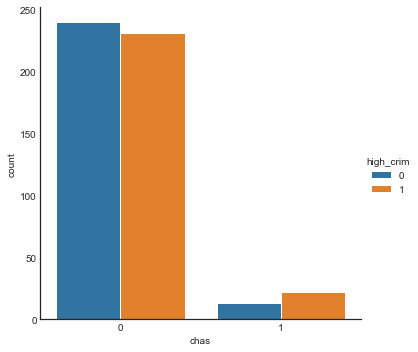

In [19]:
sns.catplot(x='chas', hue='high_crim', data=boston, kind='count')

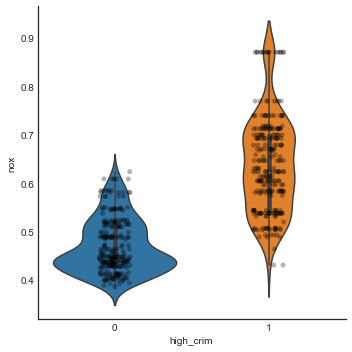

In [20]:
sns.catplot(x='high_crim', y='nox', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='nox', data=boston, color='k', alpha=0.3)

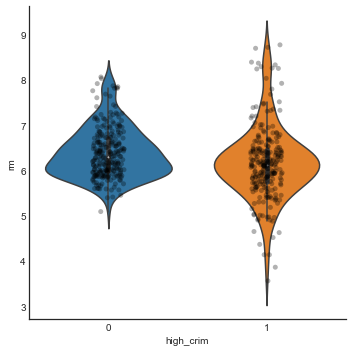

In [21]:
sns.catplot(x='high_crim', y='rm', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='rm', data=boston, color='k', alpha=0.3)

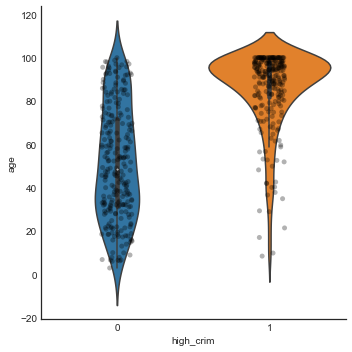

In [22]:
sns.catplot(x='high_crim', y='age', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='age', data=boston, color='k', alpha=0.3)

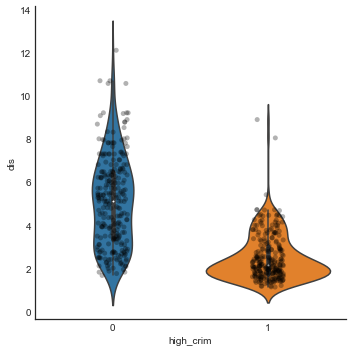

In [23]:
sns.catplot(x='high_crim', y='dis', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='dis', data=boston, color='k', alpha=0.3)

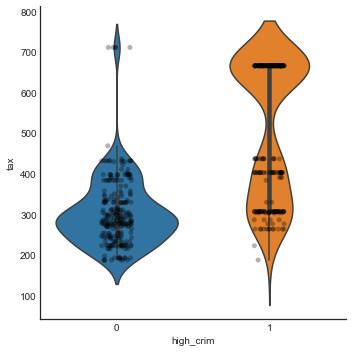

In [24]:
sns.catplot(x='high_crim', y='tax', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='tax', data=boston, color='k', alpha=0.3)

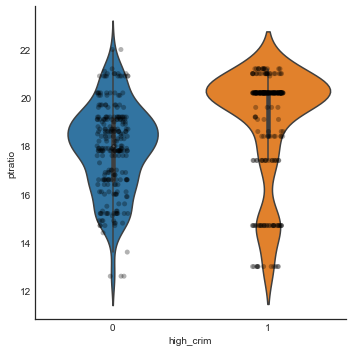

In [25]:
sns.catplot(x='high_crim', y='ptratio', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='ptratio', data=boston, color='k', alpha=0.3)

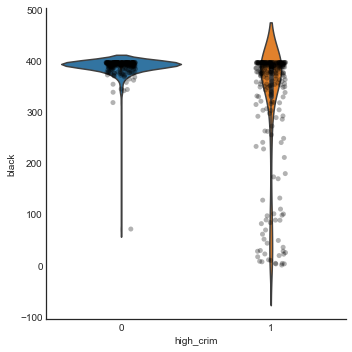

In [26]:
sns.catplot(x='high_crim', y='black', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='black', data=boston, color='k', alpha=0.3)

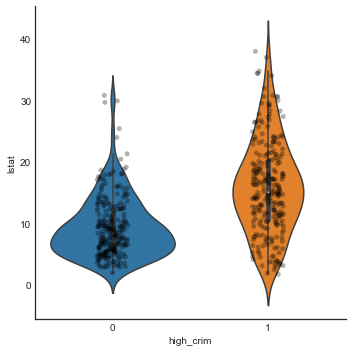

In [27]:
sns.catplot(x='high_crim', y='lstat', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='lstat', data=boston, color='k', alpha=0.3)

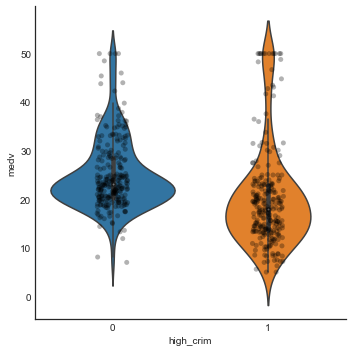

In [28]:
sns.catplot(x='high_crim', y='medv', data=boston, kind='violin')
sns.stripplot(x='high_crim', y='medv', data=boston, color='k', alpha=0.3)

##### Observations

- As suggested by the pairplot, the distributions of `chas` and `rm` are very similar across classes, so we'll drop these features.
- `dis` appears to have two outliers in the high crime class (`dis` > 8)
- `black` appears to have an outlier in the low crime class (`black` < 100)
- `tax` appears to have 3-4 outliers in the low crime class (`tx` > 700).<sup><a href='#foot3' id='ref3'>3</a></sup>

## Feature Selection

Given the 0.91 correlation with `tax`, let's drop `rad` variable. We'll also drop `chas` and `rm` given the similarity in their distribution across classes. 

In [29]:
boston_2 = boston.drop(['rad', 'chas', 'rm'], axis=1)

Now we'll drop the outliers we noticed above

In [30]:
boston_2 = boston_2[(boston_2['dis'] < 8) | (boston_2['high_crim'] == 1)]
boston_2 = boston_2[(boston_2['black'] > 100) | (boston_2['high_crim'] == 1)]
boston_2 = boston_2[(boston_2['tax'] < 700) | (boston_2['high_crim'] == 1)]

and retest

In [31]:
X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(boston_2.drop(['high_crim'], axis=1)), boston_2['high_crim'])

In [32]:
print("The dummy model has train accuracy {}".format(
      accuracy_score(y_train, dummy_model.fit(X_train, y_train).predict(X_train))))
print("The dummy model has test accuracy {}".format(
      accuracy_score(y_test, dummy_model.fit(X_train, y_train).predict(X_test))))

The dummy model has train accuracy 0.49444444444444446
The dummy model has test accuracy 0.49166666666666664


In [33]:
for model in models:
    print("The {} model has train accuracy {}".format(model, 
          round(accuracy_score(y_train, 
                               models[model].fit(X_train, y_train).predict(X_train)), 4)))

The Logit model has train accuracy 0.875
The LDA model has train accuracy 0.8944
The KNN1 model has train accuracy 1.0
The KNN2 model has train accuracy 0.9639
The KNN3 model has train accuracy 0.9583
The KNN4 model has train accuracy 0.9528
The KNN5 model has train accuracy 0.9333


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [34]:
for model in models:
    print("The {} model has test accuracy {}".format(model, 
          round(accuracy_score(y_test, 
                               models[model].fit(X_train, y_train).predict(X_test)), 4)))

The Logit model has test accuracy 0.8083
The LDA model has test accuracy 0.8
The KNN1 model has test accuracy 0.9
The KNN2 model has test accuracy 0.925
The KNN3 model has test accuracy 0.9083
The KNN4 model has test accuracy 0.9333
The KNN5 model has test accuracy 0.9167


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Collinearity

We're still getting a collinearity warning from the LDA model. Let's try dropping any more correlated variables

In [35]:
boston_3 = boston_2.drop(['lstat', 'nox', 'indus'], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(boston_3.drop(['high_crim'], axis=1)), boston_3['high_crim'])

In [37]:
print("The dummy model has train accuracy {}".format(
      accuracy_score(y_train, dummy_model.fit(X_train, y_train).predict(X_train))))
print("The dummy model has test accuracy {}".format(
      accuracy_score(y_test, dummy_model.fit(X_train, y_train).predict(X_test))))

The dummy model has train accuracy 0.5305555555555556
The dummy model has test accuracy 0.5333333333333333


In [38]:
for model in models:
    print("The {} model has train accuracy {}".format(model, 
          round(accuracy_score(y_train, 
                               models[model].fit(X_train, y_train).predict(X_train)), 4)))

The Logit model has train accuracy 0.8667
The LDA model has train accuracy 0.8333
The KNN1 model has train accuracy 1.0
The KNN2 model has train accuracy 0.9583
The KNN3 model has train accuracy 0.95
The KNN4 model has train accuracy 0.9444
The KNN5 model has train accuracy 0.9361


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [39]:
for model in models:
    print("The {} model has test accuracy {}".format(model, 
          round(accuracy_score(y_test, 
                               models[model].fit(X_train, y_train).predict(X_test)), 4)))

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The Logit model has test accuracy 0.8417
The LDA model has test accuracy 0.825
The KNN1 model has test accuracy 0.95
The KNN2 model has test accuracy 0.9333
The KNN3 model has test accuracy 0.8833
The KNN4 model has test accuracy 0.9083
The KNN5 model has test accuracy 0.8917


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Interactions

Our set of features is now small enough

In [40]:
boston_3.head()

zn   age     dis  tax  ptratio   black  medv  high_crim
0  18.0  65.2  4.0900  296     15.3  396.90  24.0          0
1   0.0  78.9  4.9671  242     17.8  396.90  21.6          0
2   0.0  61.1  4.9671  242     17.8  392.83  34.7          0
3   0.0  45.8  6.0622  222     18.7  394.63  33.4          0
4   0.0  54.2  6.0622  222     18.7  396.90  36.2          0

that we can include all interaction terms and see if we can get improvement

In [41]:
from itertools import combinations

# all pairs of columns except high_crim
col_pairs = combinations(boston_3.drop(['high_crim'], axis=1), 2)

# assemble interactions in dataframe
interactions = pd.DataFrame({col1 + ':' + col2: boston_3[col1]*boston_3[col2] 
                               for (col1, col2) in col_pairs})
interactions.head()

zn:age  zn:dis  zn:tax  zn:ptratio  zn:black  zn:medv    age:dis  age:tax  \
0  1173.6   73.62  5328.0       275.4    7144.2    432.0  266.66800  19299.2   
1     0.0    0.00     0.0         0.0       0.0      0.0  391.90419  19093.8   
2     0.0    0.00     0.0         0.0       0.0      0.0  303.48981  14786.2   
3     0.0    0.00     0.0         0.0       0.0      0.0  277.64876  10167.6   
4     0.0    0.00     0.0         0.0       0.0      0.0  328.57124  12032.4   

   age:ptratio  age:black     ...        dis:tax  dis:ptratio    dis:black  \
0       997.56  25877.880     ...      1210.6400     62.57700  1623.321000   
1      1404.42  31315.410     ...      1202.0382     88.41438  1971.441990   
2      1087.58  24001.913     ...      1202.0382     88.41438  1951.225893   
3       856.46  18074.054     ...      1345.8084    113.36314  2392.325986   
4      1013.54  21511.980     ...      1345.8084    113.36314  2406.087180   

    dis:medv  tax:ptratio  tax:black  tax:medv  ptratio:black  ptratio:medv  \
0   98.16000       4528.8  117482.40    7104.0       6072.570        367.20   
1  107.28936       4307.6   96049.80    5227.2       7064.820        384.48   
2  172.35837       4307.6   95064.86    8397.4       6992.374        617.66   
3  202.47748       4151.4   87607.86    7414.8       7379.581        624.58   
4  219.45164       4151.4   88111.80    8036.4       7422.030        676.94   

   black:medv  
0    9525.600  
1    8573.040  
2   13631.201  
3   13180.642  
4   14367.780  

[5 rows x 21 columns]

/Users/home/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/home/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


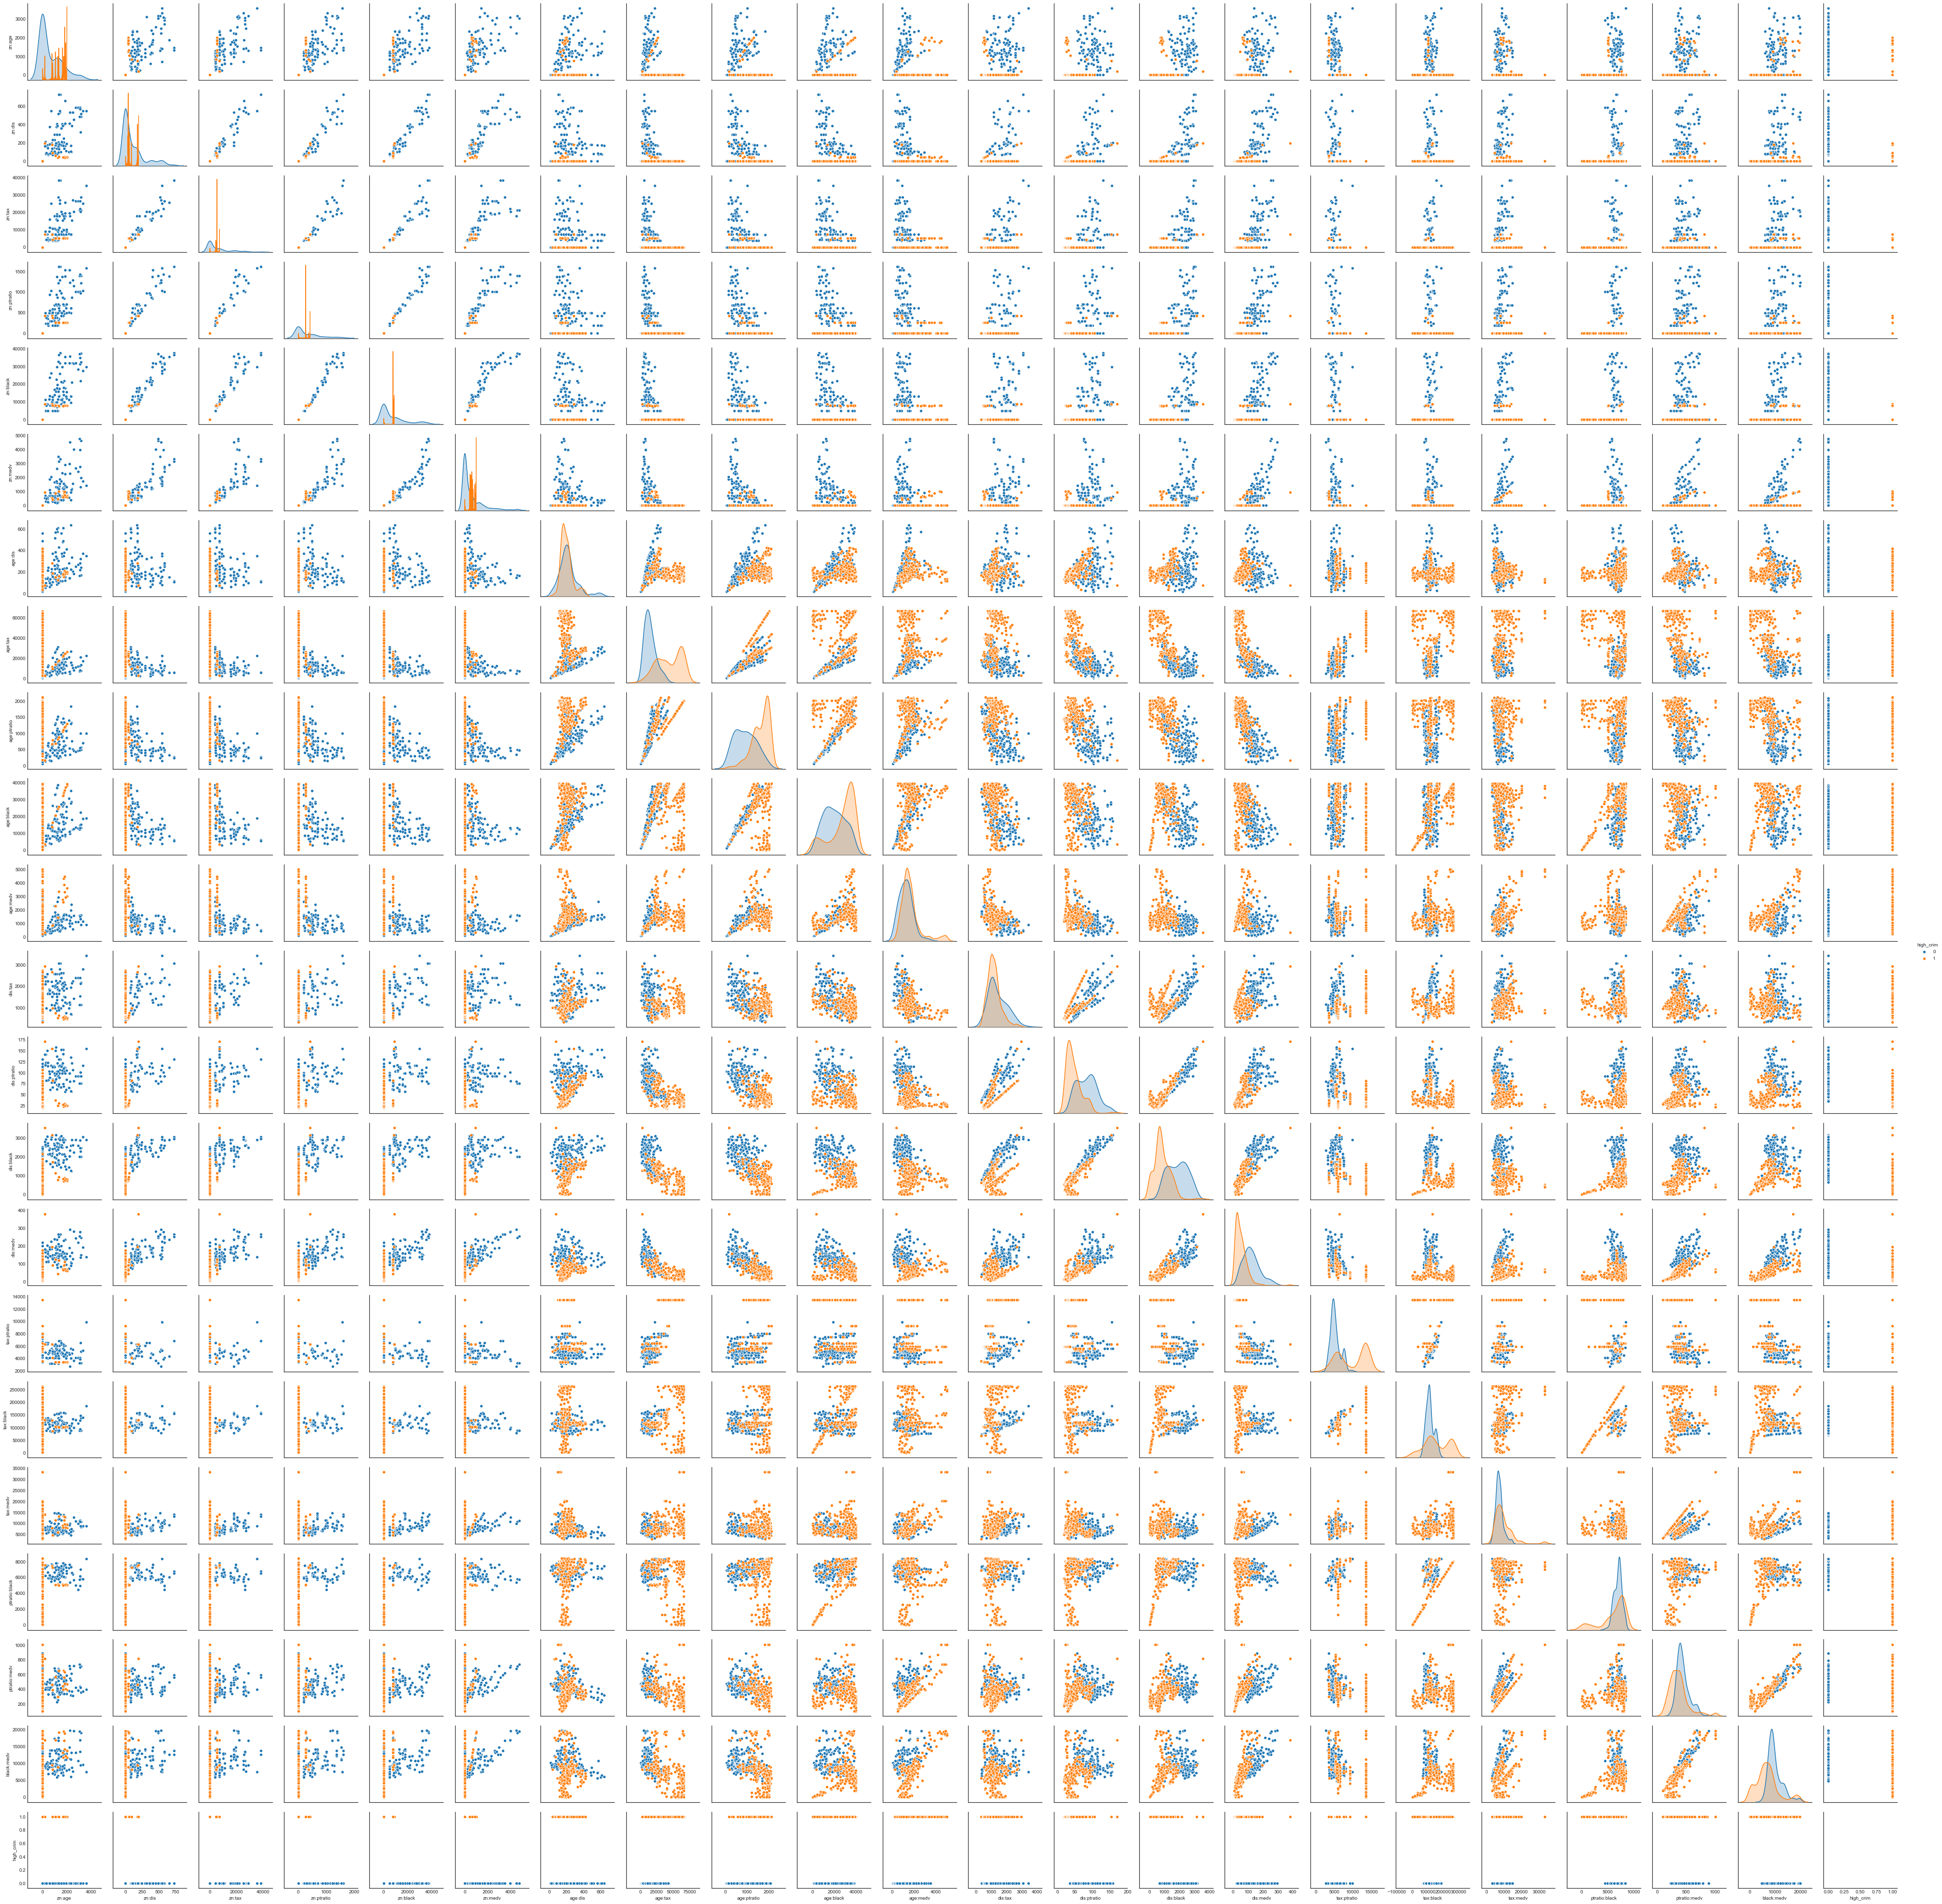

In [42]:
sns.pairplot(pd.concat([interactions, boston_3['high_crim']], axis=1), hue='high_crim')

In [43]:
interactions.corr()[abs(interactions.corr()) > 0.70]

zn:age    zn:dis    zn:tax  zn:ptratio  zn:black   zn:medv  \
zn:age         1.000000  0.809044  0.836926    0.862228  0.872434  0.811637   
zn:dis         0.809044  1.000000  0.977948    0.963280  0.973811  0.912649   
zn:tax         0.836926  0.977948  1.000000    0.965968  0.972944  0.900585   
zn:ptratio     0.862228  0.963280  0.965968    1.000000  0.991143  0.929864   
zn:black       0.872434  0.973811  0.972944    0.991143  1.000000  0.956084   
zn:medv        0.811637  0.912649  0.900585    0.929864  0.956084  1.000000   
age:dis             NaN       NaN       NaN         NaN       NaN       NaN   
age:tax             NaN       NaN       NaN         NaN       NaN       NaN   
age:ptratio         NaN       NaN       NaN         NaN       NaN       NaN   
age:black           NaN       NaN       NaN         NaN       NaN       NaN   
age:medv            NaN       NaN       NaN         NaN       NaN       NaN   
dis:tax             NaN       NaN       NaN         NaN       NaN       NaN   
dis:ptratio         NaN       NaN       NaN         NaN       NaN       NaN   
dis:black           NaN       NaN       NaN         NaN       NaN       NaN   
dis:medv            NaN  0.712078       NaN         NaN  0.701793  0.701289   
tax:ptratio         NaN       NaN       NaN         NaN       NaN       NaN   
tax:black           NaN       NaN       NaN         NaN       NaN       NaN   
tax:medv            NaN       NaN       NaN         NaN       NaN       NaN   
ptratio:black       NaN       NaN       NaN         NaN       NaN       NaN   
ptratio:medv        NaN       NaN       NaN         NaN       NaN       NaN   
black:medv          NaN       NaN       NaN         NaN       NaN       NaN   

               age:dis   age:tax  age:ptratio  age:black     ...      \
zn:age             NaN       NaN          NaN        NaN     ...       
zn:dis             NaN       NaN          NaN        NaN     ...       
zn:tax             NaN       NaN          NaN        NaN     ...       
zn:ptratio         NaN       NaN          NaN        NaN     ...       
zn:black           NaN       NaN          NaN        NaN     ...       
zn:medv            NaN       NaN          NaN        NaN     ...       
age:dis            1.0       NaN          NaN        NaN     ...       
age:tax            NaN  1.000000     0.842898        NaN     ...       
age:ptratio        NaN  0.842898     1.000000        NaN     ...       
age:black          NaN       NaN          NaN        1.0     ...       
age:medv           NaN       NaN          NaN        NaN     ...       
dis:tax            NaN       NaN          NaN        NaN     ...       
dis:ptratio        NaN       NaN          NaN        NaN     ...       
dis:black          NaN -0.763407    -0.731611        NaN     ...       
dis:medv           NaN -0.745526    -0.786899        NaN     ...       
tax:ptratio        NaN  0.898734          NaN        NaN     ...       
tax:black          NaN       NaN          NaN        NaN     ...       
tax:medv           NaN       NaN          NaN        NaN     ...       
ptratio:black      NaN       NaN          NaN        NaN     ...       
ptratio:medv       NaN       NaN          NaN        NaN     ...       
black:medv         NaN       NaN          NaN        NaN     ...       

                dis:tax  dis:ptratio  dis:black  dis:medv  tax:ptratio  \
zn:age              NaN          NaN        NaN       NaN          NaN   
zn:dis              NaN          NaN        NaN  0.712078          NaN   
zn:tax              NaN          NaN        NaN       NaN          NaN   
zn:ptratio          NaN          NaN        NaN       NaN          NaN   
zn:black            NaN          NaN        NaN  0.701793          NaN   
zn:medv             NaN          NaN        NaN  0.701289          NaN   
age:dis             NaN          NaN        NaN       NaN          NaN   
age:tax             NaN          NaN  -0.763407 -0.745526     0.898734   
age:ptratio         NaN    

In [44]:
drop_cols = [col_name for col_name in interactions.columns if 'zn' in col_name]
drop_cols += ['dis:medv', 'age:ptratio', 'dis:black', 'tax:ptratio', 'dis:ptratio', 'dis:black', 'ptratio:medv',
              'age:dis', 'age:medv', 'dis:tax', 'tax:medv']
interactions = interactions.drop(drop_cols, axis=1)

In [45]:
boston_4 = pd.concat([boston_3.drop(['high_crim'], axis=1), interactions, boston_3['high_crim']], axis=1)
boston_4.head()

zn   age     dis  tax  ptratio   black  medv  age:tax  age:black  \
0  18.0  65.2  4.0900  296     15.3  396.90  24.0  19299.2  25877.880   
1   0.0  78.9  4.9671  242     17.8  396.90  21.6  19093.8  31315.410   
2   0.0  61.1  4.9671  242     17.8  392.83  34.7  14786.2  24001.913   
3   0.0  45.8  6.0622  222     18.7  394.63  33.4  10167.6  18074.054   
4   0.0  54.2  6.0622  222     18.7  396.90  36.2  12032.4  21511.980   

   tax:black  ptratio:black  black:medv  high_crim  
0  117482.40       6072.570    9525.600          0  
1   96049.80       7064.820    8573.040          0  
2   95064.86       6992.374   13631.201          0  
3   87607.86       7379.581   13180.642          0  
4   88111.80       7422.030   14367.780          0

In [46]:
# standardize everything except high_crim since interaction terms are so much bigger
boston_4 = boston_4.drop(['high_crim'], axis=1)
boston_4 = (boston_4 - boston_4.mean())/boston_4.std()
boston_4 = pd.concat([boston_4, boston_3['high_crim']], axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(boston_4.drop(['high_crim'], axis=1)), boston_4['high_crim'])

In [48]:
print("The dummy model has train accuracy {}".format(
      accuracy_score(y_train, dummy_model.fit(X_train, y_train).predict(X_train))))
print("The dummy model has test accuracy {}".format(
      accuracy_score(y_test, dummy_model.fit(X_train, y_train).predict(X_test))))

The dummy model has train accuracy 0.5055555555555555
The dummy model has test accuracy 0.55


In [49]:
for model in models:
    print("The {} model has train accuracy {}".format(model, 
          round(accuracy_score(y_train, 
                               models[model].fit(X_train, y_train).predict(X_train)), 4)))

The Logit model has train accuracy 0.8472
The LDA model has train accuracy 0.8444
The KNN1 model has train accuracy 1.0
The KNN2 model has train accuracy 0.95
The KNN3 model has train accuracy 0.9444
The KNN4 model has train accuracy 0.9194
The KNN5 model has train accuracy 0.9222


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [50]:
for model in models:
    print("The {} model has test accuracy {}".format(model, 
          round(accuracy_score(y_test, 
                               models[model].fit(X_train, y_train).predict(X_test)), 4)))

The Logit model has test accuracy 0.8333
The LDA model has test accuracy 0.825
The KNN1 model has test accuracy 0.8833
The KNN2 model has test accuracy 0.8917
The KNN3 model has test accuracy 0.9083
The KNN4 model has test accuracy 0.8667
The KNN5 model has test accuracy 0.8833


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


The KNN3 and KNN4 models are better with these interactions, but still tied with KNN2 for first with 93.3% accuracy

## Nonlinearity and transformations

### Some naive transformations

We weren't able to beat the accuracy of KNN2 by including interactions. Let's try some transformations on the original features

In [51]:
from numpy import log

df = boston_3.drop(['high_crim'], axis=1)

# log df
log_df = log(df.drop(['zn'], axis=1)).rename({col: 'log(' + col + ')' for col in boston_3.columns}, axis='columns')

# sq df
sq_df = df.drop(['zn'], axis=1)**2
sq_df = sq_df.rename({col: col + '^2' for col in boston_3.columns}, axis='columns')
sq_df.head()

# normalize
log_df = (log_df - log_df.mean())/log_df.std()
sq_df = (sq_df - sq_df.mean())/sq_df.std()

# concat
boston_5 = pd.concat([df, log_df, sq_df, boston_3['high_crim']], axis=1)
boston_5.head()

zn   age     dis  tax  ptratio   black  medv  log(age)  log(dis)  \
0  18.0  65.2  4.0900  296     15.3  396.90  24.0  0.107596  0.507131   
1   0.0  78.9  4.9671  242     17.8  396.90  21.6  0.425009  0.890189   
2   0.0  61.1  4.9671  242     17.8  392.83  34.7 -0.000495  0.890189   
3   0.0  45.8  6.0622  222     18.7  394.63  33.4 -0.480184  1.282996   
4   0.0  54.2  6.0622  222     18.7  396.90  36.2 -0.199926  1.282996   

   log(tax)  log(ptratio)  log(black)  log(medv)     age^2     dis^2  \
0 -0.612061     -1.415498    0.304822   0.347164 -0.401921  0.035014   
1 -1.119060     -0.217665    0.304822   0.090660  0.176982  0.538601   
2 -1.119060     -0.217665    0.291773   1.244740 -0.553769  0.538601   
3 -1.336186      0.172721    0.297561   1.151781 -1.033382  1.304266   
4 -1.336186      0.172721    0.304822   1.347768 -0.787061  1.304266   

      tax^2  ptratio^2   black^2    medv^2  high_crim  
0 -0.687747  -1.436963  0.526018 -0.038104          0  
1 -0.872406  -0.361721  0.526018 -0.243573          0  
2 -0.872406  -0.361721  0.450105  1.141108          0  
3 -0.931391   0.065127  0.483582  0.974897          0  
4 -0.931391   0.065127  0.526018  1.340776          0

In [52]:
boston_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 505
Data columns (total 20 columns):
zn              480 non-null float64
age             480 non-null float64
dis             480 non-null float64
tax             480 non-null int64
ptratio         480 non-null float64
black           480 non-null float64
medv            480 non-null float64
log(age)        480 non-null float64
log(dis)        480 non-null float64
log(tax)        480 non-null float64
log(ptratio)    480 non-null float64
log(black)      480 non-null float64
log(medv)       480 non-null float64
age^2           480 non-null float64
dis^2           480 non-null float64
tax^2           480 non-null float64
ptratio^2       480 non-null float64
black^2         480 non-null float64
medv^2          480 non-null float64
high_crim       480 non-null int32
dtypes: float64(18), int32(1), int64(1)
memory usage: 96.9 KB


In [53]:
X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(boston_5.drop(['high_crim'], axis=1)), boston_5['high_crim'])

In [54]:
print("The dummy model has train accuracy {}".format(
      accuracy_score(y_train, dummy_model.fit(X_train, y_train).predict(X_train))))
print("The dummy model has test accuracy {}".format(
      accuracy_score(y_test, dummy_model.fit(X_train, y_train).predict(X_test))))

The dummy model has train accuracy 0.49166666666666664
The dummy model has test accuracy 0.5416666666666666


In [55]:
for model in models:
    print("The {} model has train accuracy {}".format(model, 
          round(accuracy_score(y_train, 
                               models[model].fit(X_train, y_train).predict(X_train)), 4)))

The Logit model has train accuracy 0.8694
The LDA model has train accuracy 0.9
The KNN1 model has train accuracy 1.0
The KNN2 model has train accuracy 0.9639
The KNN3 model has train accuracy 0.9583
The KNN4 model has train accuracy 0.9528
The KNN5 model has train accuracy 0.9472


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [56]:
for model in models:
    print("The {} model has test accuracy {}".format(model, 
          round(accuracy_score(y_test, 
                               models[model].fit(X_train, y_train).predict(X_test)), 4)))

The Logit model has test accuracy 0.8583
The LDA model has test accuracy 0.875
The KNN1 model has test accuracy 0.925
The KNN2 model has test accuracy 0.95
The KNN3 model has test accuracy 0.95
The KNN4 model has test accuracy 0.9417
The KNN5 model has test accuracy 0.9583


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Recursive feature elimination

As an alternative to the visual methods of feature elimination used above, let's use `sklearn`'s recursive feature selection, which works for the parametric models.

The parametric models have been underperforming the KNN models throughout, so this will perhaps give them an advantage.

### On the original data set

In [57]:
boston['const'] = 1
boston = pd.concat([boston['const'], boston.drop(['high_crim', 'const'], axis=1), boston['high_crim']], axis=1)
boston.head()

const    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0      1  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1      1   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2      1   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3      1   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4      1   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  high_crim  
0  396.90   4.98  24.0          0  
1  396.90   9.14  21.6          0  
2  392.83   4.03  34.7          0  
3  394.63   2.94  33.4          0  
4  396.90   5.33  36.2          0

In [58]:
# standardize appropriate columns
cols = [col for col in boston.columns if col not in {'const', 'chas', 'high_crim'}]
df = boston[cols]
df = (df - df.mean()) / df.std()
df = pd.concat([boston.const, boston.chas, df, boston.high_crim], axis=1)
df.head()

const  chas        zn     indus       nox        rm       age       dis  \
0      1     0  0.284548 -1.286636 -0.144075  0.413263 -0.119895  0.140075   
1      1     0 -0.487240 -0.592794 -0.739530  0.194082  0.366803  0.556609   
2      1     0 -0.487240 -0.592794 -0.739530  1.281446 -0.265549  0.556609   
3      1     0 -0.487240 -1.305586 -0.834458  1.015298 -0.809088  1.076671   
4      1     0 -0.487240 -1.305586 -0.834458  1.227362 -0.510674  1.076671   

        rad       tax   ptratio     black     lstat      medv  high_crim  
0 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  0.159528          0  
1 -0.867024 -0.986353 -0.302794  0.440616 -0.491953 -0.101424          0  
2 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  1.322937          0  
3 -0.752178 -1.105022  0.112920  0.415751 -1.360171  1.181589          0  
4 -0.752178 -1.105022  0.112920  0.440616 -1.025487  1.486032          0

In [59]:
X, y = df.drop(['high_crim'], axis=1), df['high_crim']

In [60]:
from sklearn.feature_selection import RFECV

Logit_rfecv = RFECV(models['Logit'], cv=10).fit(X, y)
Logit_rfecv.ranking_

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

array([ 2,  6,  1,  8,  1, 10,  5,  3,  1,  1,  7,  1,  9,  4])

In [61]:
LDA_rfecv = RFECV(models['LDA'], cv=10).fit(X, y)
LDA_rfecv.ranking_

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variabl

array([14, 13,  8, 11,  1, 12,  3, 10,  2,  5,  6,  7,  9,  4])

In [62]:
Logit_df = boston[boston.columns[list(Logit_rfecv.support_) + [True]]]

X_train, X_test, y_train, y_test = train_test_split(Logit_df.drop(['high_crim'], axis=1), Logit_df['high_crim'])

In [63]:
print("The Logit model has train accuracy {}".format(
      round(accuracy_score(y_train, 
                               models['Logit'].fit(X_train, y_train).predict(X_train)), 4)))
print("The Logit model has test accuracy {}".format(
      round(accuracy_score(y_test, 
                               models['Logit'].fit(X_train, y_train).predict(X_test)), 4)))

The Logit model has train accuracy 0.8496
The Logit model has test accuracy 0.874


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
LDA_df = boston[boston.columns[list(LDA_rfecv.support_) + [True]]]

X_train, X_test, y_train, y_test = train_test_split(LDA_df.drop(['high_crim'], axis=1), LDA_df['high_crim'])

In [65]:
print("The LDA model has train accuracy {}".format(
      round(accuracy_score(y_train, 
                               models['LDA'].fit(X_train, y_train).predict(X_train)), 4)))
print("The LDA model has test accuracy {}".format(
      round(accuracy_score(y_test, 
                               models['LDA'].fit(X_train, y_train).predict(X_test)), 4)))

The LDA model has train accuracy 0.8232
The LDA model has test accuracy 0.8346


### On the original data + interactions

In [66]:
# all pairs of columns in except high_crim
col_pairs = combinations(boston.drop(['high_crim', 'const'], axis=1), 2)

# assemble interactions in dataframe
interactions = pd.DataFrame({col1 + ':' + col2: boston[col1]*boston[col2] for (col1, col2) in col_pairs})

# total dataframe
boston_interact = pd.concat([boston.drop(['high_crim'], axis=1), interactions, boston['high_crim']], axis=1)
boston_interact.head()

const    zn  indus  chas    nox     rm   age     dis  rad  tax    ...      \
0      1  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296    ...       
1      1   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242    ...       
2      1   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242    ...       
3      1   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222    ...       
4      1   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222    ...       

   tax:black  tax:lstat  tax:medv  ptratio:black  ptratio:lstat  ptratio:medv  \
0  117482.40    1474.08    7104.0       6072.570         76.194        367.20   
1   96049.80    2211.88    5227.2       7064.820        162.692        384.48   
2   95064.86     975.26    8397.4       6992.374         71.734        617.66   
3   87607.86     652.68    7414.8       7379.581         54.978        624.58   
4   88111.80    1183.26    8036.4       7422.030         99.671        676.94   

   black:lstat  black:medv  lstat:medv  high_crim  
0    1976.5620    9525.600     119.520          0  
1    3627.6660    8573.040     197.424          0  
2    1583.1049   13631.201     139.841          0  
3    1160.2122   13180.642      98.196          0  
4    2115.4770   14367.780     192.946          0  

[5 rows x 93 columns]

In [67]:
# standardize appropriate columns
cols = [col for col in boston_interact.columns if col not in {'const', 'chas', 'high_crim'}]
df = boston_interact[cols]
df = (df - df.mean()) / df.std()
df = pd.concat([boston_interact.const, boston_interact.chas, df, boston_interact.high_crim], axis=1)
df.head()

const  chas        zn     indus       nox        rm       age       dis  \
0      1     0  0.284548 -1.286636 -0.144075  0.413263 -0.119895  0.140075   
1      1     0 -0.487240 -0.592794 -0.739530  0.194082  0.366803  0.556609   
2      1     0 -0.487240 -0.592794 -0.739530  1.281446 -0.265549  0.556609   
3      1     0 -0.487240 -1.305586 -0.834458  1.015298 -0.809088  1.076671   
4      1     0 -0.487240 -1.305586 -0.834458  1.227362 -0.510674  1.076671   

        rad       tax    ...      tax:black  tax:lstat  tax:medv  \
0 -0.981871 -0.665949    ...      -0.330250  -0.854748 -0.345437   
1 -0.867024 -0.986353    ...      -0.661922  -0.709601 -0.818692   
2 -0.867024 -0.986353    ...      -0.677164  -0.952880 -0.019292   
3 -0.752178 -1.105022    ...      -0.792561  -1.016341 -0.267065   
4 -0.752178 -1.105022    ...      -0.784763  -0.911961 -0.110322   

   ptratio:black  ptratio:lstat  ptratio:medv  black:lstat  black:medv  \
0      -0.258522      -1.118571     -0.264575    -0.879380    0.296187   
1       0.281461      -0.525338     -0.146023    -0.247621    0.062881   
2       0.242036      -1.149159      1.453735    -1.029928    1.301754   
3       0.452754      -1.264078      1.501210    -1.191739    1.191400   
4       0.475855      -0.957558      1.860432    -0.826227    1.482160   

   lstat:medv  high_crim  
0   -1.366892          0  
1   -0.458594          0  
2   -1.129965          0  
3   -1.615512          0  
4   -0.510804          0  

[5 rows x 93 columns]

In [68]:
X, y = df.drop(['high_crim'], axis=1), df['high_crim']

In [69]:
from sklearn.feature_selection import RFECV

Logit_rfecv = RFECV(models['Logit'], cv=5).fit(X, y)
Logit_rfecv.ranking_

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

array([17, 85, 90, 68,  1, 12, 84, 41, 25, 23, 27, 30, 37, 58, 89, 59, 56,
       83,  6, 19, 44, 62, 88, 87, 67, 48, 16, 69, 63, 81,  8, 53, 79, 49,
        7, 29, 82, 71, 76, 36, 35, 34, 15, 75, 51, 33, 74,  5, 11, 77, 45,
       91, 14, 31, 28, 13, 72, 57,  4, 52, 26, 43, 73, 42, 78, 47, 70, 39,
       60, 38, 40, 55, 24, 10,  9, 86, 65, 54, 61, 18, 46,  1, 20, 32,  2,
       21, 64,  3, 50, 80, 66, 22])

In [70]:
LDA_rfecv = RFECV(models['LDA'], cv=5).fit(X, y)
LDA_rfecv.ranking_

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variabl

array([92, 15, 22, 50, 44, 29,  4,  5,  3, 41,  8, 13, 47, 31, 88, 81, 23,
       65, 72, 78, 80, 42, 38, 37, 79, 39, 18, 89, 25, 49, 51,  1, 21, 26,
       20, 59, 32, 66, 84, 52, 69, 16, 17, 91, 77, 85, 67, 27, 74, 73, 14,
       10,  9, 57, 53, 40, 35, 68, 55, 28, 60, 70, 61, 30, 75, 87, 48,  7,
       34, 71, 36, 45, 43,  6, 62, 83, 33,  2, 19, 11, 56, 76, 24, 12, 90,
       86, 54, 46, 58, 82, 63, 64])

In [71]:
Logit_df = df[df.columns[list(Logit_rfecv.support_) + [True]]]

X_train, X_test, y_train, y_test = train_test_split(Logit_df.drop(['high_crim'], axis=1), Logit_df['high_crim'])

In [72]:
print("The Logit model has train accuracy {}".format(
      round(accuracy_score(y_train, 
                               models['Logit'].fit(X_train, y_train).predict(X_train)), 4)))
print("The Logit model has test accuracy {}".format(
      round(accuracy_score(y_test, 
                               models['Logit'].fit(X_train, y_train).predict(X_test)), 4)))

The Logit model has train accuracy 0.8707
The Logit model has test accuracy 0.8346


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
LDA_df = df[df.columns[list(LDA_rfecv.support_) + [True]]]

X_train, X_test, y_train, y_test = train_test_split(LDA_df.drop(['high_crim'], axis=1), LDA_df['high_crim'])

In [74]:
print("The LDA model has train accuracy {}".format(
      round(accuracy_score(y_train, 
                               models['LDA'].fit(X_train, y_train).predict(X_train)), 4)))
print("The LDA model has test accuracy {}".format(
      round(accuracy_score(y_test, 
                               models['LDA'].fit(X_train, y_train).predict(X_test)), 4)))

The LDA model has train accuracy 0.7599
The LDA model has test accuracy 0.7638


### On the original data + interactions + transformations

In [75]:
boston_interact_trans = pd.concat([boston.drop(['high_crim'], axis=1), interactions,
                                   log_df, sq_df, boston['high_crim']], axis=1)
boston_interact_trans.head()

const    zn  indus  chas    nox     rm   age     dis  rad  tax    ...      \
0      1  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296    ...       
1      1   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242    ...       
2      1   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242    ...       
3      1   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222    ...       
4      1   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222    ...       

   log(ptratio)  log(black)  log(medv)     age^2     dis^2     tax^2  \
0     -1.415498    0.304822   0.347164 -0.401921  0.035014 -0.687747   
1     -0.217665    0.304822   0.090660  0.176982  0.538601 -0.872406   
2     -0.217665    0.291773   1.244740 -0.553769  0.538601 -0.872406   
3      0.172721    0.297561   1.151781 -1.033382  1.304266 -0.931391   
4      0.172721    0.304822   1.347768 -0.787061  1.304266 -0.931391   

   ptratio^2   black^2    medv^2  high_crim  
0  -1.436963  0.526018 -0.038104          0  
1  -0.361721  0.526018 -0.243573          0  
2  -0.361721  0.450105  1.141108          0  
3   0.065127  0.483582  0.974897          0  
4   0.065127  0.526018  1.340776          0  

[5 rows x 105 columns]

In [76]:
# standardize appropriate columns
cols = [col for col in boston_interact_trans.columns if col not in {'const', 'chas', 'high_crim'}]
df = boston_interact_trans[cols]
df = (df - df.mean()) / df.std()
df = pd.concat([boston_interact_trans.const, boston_interact_trans.chas, df, boston_interact_trans.high_crim], axis=1)
df.head()

const  chas        zn     indus       nox        rm       age       dis  \
0      1     0  0.284548 -1.286636 -0.144075  0.413263 -0.119895  0.140075   
1      1     0 -0.487240 -0.592794 -0.739530  0.194082  0.366803  0.556609   
2      1     0 -0.487240 -0.592794 -0.739530  1.281446 -0.265549  0.556609   
3      1     0 -0.487240 -1.305586 -0.834458  1.015298 -0.809088  1.076671   
4      1     0 -0.487240 -1.305586 -0.834458  1.227362 -0.510674  1.076671   

        rad       tax    ...      log(ptratio)  log(black)  log(medv)  \
0 -0.981871 -0.665949    ...         -1.415498    0.304822   0.347164   
1 -0.867024 -0.986353    ...         -0.217665    0.304822   0.090660   
2 -0.867024 -0.986353    ...         -0.217665    0.291773   1.244740   
3 -0.752178 -1.105022    ...          0.172721    0.297561   1.151781   
4 -0.752178 -1.105022    ...          0.172721    0.304822   1.347768   

      age^2     dis^2     tax^2  ptratio^2   black^2    medv^2  high_crim  
0 -0.401921  0.035014 -0.687747  -1.436963  0.526018 -0.038104          0  
1  0.176982  0.538601 -0.872406  -0.361721  0.526018 -0.243573          0  
2 -0.553769  0.538601 -0.872406  -0.361721  0.450105  1.141108          0  
3 -1.033382  1.304266 -0.931391   0.065127  0.483582  0.974897          0  
4 -0.787061  1.304266 -0.931391   0.065127  0.526018  1.340776          0  

[5 rows x 105 columns]

In [77]:
df = df.dropna()

X, y = df.drop(['high_crim'], axis=1), df['high_crim']

In [78]:
from sklearn.feature_selection import RFECV

Logit_rfecv = RFECV(models['Logit'], cv=5).fit(X, y)
Logit_rfecv.ranking_

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

array([ 10,  91,  99,  60,   1,  41,  86,  59,  49,  35,  64,  20,  51,
        71,  84,  54,  40, 101,  32,   2,  39,  63,  85, 102,  96,  74,
        27,  88,  33,  75,  25,  90,  34,  92,  24,  95,  72,  76,  87,
        45,  44,  23,  42,  83,  68,  28,  81,   4,  21,  79,  58,  94,
        14,  29,  46,  15,  77,  78,   9,  57,  18,   3,  61,  43,  93,
        69,  82,  52,  98,  47,  62,  37,  36,   5,  38,  80,  53,  66,
        67,  16,  50,   1,  73,  31,  12,  30,  48,  11,  55,  89,  70,
        26,  22,  13,   8,  65,  97, 100,  17,   6,   7,  19,   1,  56])

In [79]:
LDA_rfecv = RFECV(models['LDA'], cv=5).fit(X, y)
LDA_rfecv.ranking_

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variabl

array([102,  21,  25,  56,  10,  37,  43,   7,   3,  31,   1,   6,  24,
        48,  89,  91,  26,  27,  99,  68,  69,  32, 100,  58,  76,  83,
        22,  34,  16,  64,  85,   1,  15,  73,  57,  86,  66,  65,  81,
        55,  94,  20,  19,  41,  84, 101,  95,  38,  60,  90,  11,  75,
         9,  74,  40,  47,  42,  28,  33,  18,  53,  82,  62,  45,  61,
        63,  92,  52,  44,  93,  46,  14,  13,   8,  51,  77,  70,  36,
        17,   4,  39,  87,  35,   5,  29,  54,  30,  23,  49,  97,  72,
        78,  71,  50,  59,  12,  98,  80,  88,  67,   2,   1,  96,  79])

In [80]:
Logit_df = df[df.columns[list(Logit_rfecv.support_) + [True]]]

X_train, X_test, y_train, y_test = train_test_split(Logit_df.drop(['high_crim'], axis=1), Logit_df['high_crim'])

In [81]:
print("The Logit model has train accuracy {}".format(
      round(accuracy_score(y_train, 
                               models['Logit'].fit(X_train, y_train).predict(X_train)), 4)))
print("The Logit model has test accuracy {}".format(
      round(accuracy_score(y_test, 
                               models['Logit'].fit(X_train, y_train).predict(X_test)), 4)))

The Logit model has train accuracy 0.8806
The Logit model has test accuracy 0.8917


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
LDA_df = df[df.columns[list(LDA_rfecv.support_) + [True]]]

X_train, X_test, y_train, y_test = train_test_split(LDA_df.drop(['high_crim'], axis=1), LDA_df['high_crim'])

In [83]:
print("The LDA model has train accuracy {}".format(
      round(accuracy_score(y_train, 
                               models['LDA'].fit(X_train, y_train).predict(X_train)), 4)))
print("The LDA model has test accuracy {}".format(
      round(accuracy_score(y_test, 
                               models['LDA'].fit(X_train, y_train).predict(X_test)), 4)))

The LDA model has train accuracy 0.875
The LDA model has test accuracy 0.8583


### Findings

The maximum accuracy we were able to achieve for the parametric models using recursive feature elimination was 89% for the LDA model. This is still less than 90%, a lower bound for the performance of all KNN models we considered

## Best test accuracy result

The best test accuracy result we were able to achieve was 95\%. 

This accuracy was achieved by KNN 1 by adding a constant, using ad-hoc feature elimination, and removing outliers from the original feature set

In [94]:
boston_3['const'] = 1
KNN1_df = pd.concat([boston_3['const'], boston_3.drop(['const'], axis=1)], axis=1)
KNN1_df.head()

const    zn   age     dis  tax  ptratio   black  medv  high_crim
0      1  18.0  65.2  4.0900  296     15.3  396.90  24.0          0
1      1   0.0  78.9  4.9671  242     17.8  396.90  21.6          0
2      1   0.0  61.1  4.9671  242     17.8  392.83  34.7          0
3      1   0.0  45.8  6.0622  222     18.7  394.63  33.4          0
4      1   0.0  54.2  6.0622  222     18.7  396.90  36.2          0

KNN2 and KNN3 also achieved 95% test accuracy on the same data and features, with log and square transformations, standardized

In [95]:
boston_4['const'] = 1
KNN2_df = pd.concat([boston_4['const'], boston_4.drop(['const'], axis=1)], axis=1)
KNN2_df.head()

const        zn       age       dis       tax   ptratio     black  \
0      1  0.410014 -0.161725  0.275539 -0.670974 -1.433859  0.442341   
1      1 -0.457932  0.332698  0.758621 -0.991114 -0.290962  0.442341   
2      1 -0.457932 -0.309691  0.758621 -0.991114 -0.290962  0.398359   
3      1 -0.457932 -0.861858  1.361771 -1.109685  0.120480  0.417810   
4      1 -0.457932 -0.558708  1.361771 -1.109685  0.120480  0.442341   

       medv   age:tax  age:black  tax:black  ptratio:black  black:medv  \
0  0.152644 -0.555560   0.152130  -0.326258      -0.244323    0.290271   
1 -0.105157 -0.565460   0.621200  -0.657951       0.288645    0.059675   
2  1.302009 -0.773072  -0.009700  -0.673195       0.249732    1.284156   
3  1.162367 -0.995673  -0.521068  -0.788600       0.457713    1.175084   
4  1.463135 -0.905796  -0.224495  -0.780801       0.480514    1.462467   

   high_crim  
0          0  
1          0  
2          0  
3          0  
4          0

These results depend on random values of hyperparameters (e.g. `train_test_split`, cross-validation parameter in `RFECV`), so the results will differ each time this kernel is run. 

Given an overall preference for simplicity (e.g. due to the bias-variance tradeoff) and considering the computational resource advantage, the best choice seems to be KNN1 above, i.e.

- model: KNN1
- features: `zn`, `age`, `dis`, `tax`, `ptratio`, `black`, `medv`
- data: `boston` with features above with outliers removed (`dis` > 8, `black` < 100, `tax` > 700)

For fun, let's fit it one more time on the full dataset

In [98]:
X, y = KNN1_df.drop(['high_crim'], axis=1), KNN1_df['high_crim']

print("The KNN1 model has total accuracy {}".format(
      round(accuracy_score(y, models['KNN1'].fit(X, y).predict(X)), 4)))

The KNN1 model has total accuracy 1.0


Very nice!

## Footnotes

<p>
    <div id="foot1"> 1. Since `high_crim` is derived from `crim` using it for prediction is a somewhat artificial scenario. It seems like in a real-life situation, either (1) `crim` data would be present, in which case we might be doing linear reg on `crim` instead of classification of `high_crim`, and we could classify post-hoc or (2) `crim` wouldn't be present but `high_crim` would be in which case treating it as a classification problem would make sense.
    </div>
    <a href="#ref1"> &#x21A9; </a>
</p>

<p>
    <div id="foot2"> 2. I'm calling these "naive" models.
    </div>
    <a href="#ref2"> &#x21A9; </a>
</p>

<p>
    <div id="foot3"> 3. The pattern here seems opposite of what might be expected, namely that high crime would be associated with lower property tax rate and vice versa. One potential explanation for this is that crime are disproportionately reported or responded to in towns with higher property tax rate. Another is that towns with higher crime tend to raise more revenue taxes (as opposed to say, sales tax).
    </div>
    <a href="#ref3"> &#x21A9; </a>
</p>


